# 2. Logistic Regression

In [71]:
import numpy as np
import pandas as pd
import sklearn
import pickle
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc

# 1.BOW

## loading dataset

#### Loading BOW vectors

In [7]:
X_train_bow = pickle.load(open('bow_vectors/X_train_bow','rb'))
X_test_bow = pickle.load(open('bow_vectors/X_test_bow','rb'))
bow_features = pickle.load(open('bow_vectors/bow_features','rb'))

In [8]:
y_train = np.load('split dataset/y_train.npy',allow_pickle = True)
y_test = np.load('split dataset/y_test.npy',allow_pickle = True)

In [9]:
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1,1,10,100,1000]
grid = {'penalty': penalty, 'C': C}
log_reg = LogisticRegression(solver = 'liblinear')
gridcv = GridSearchCV(log_reg, grid, cv =5,return_train_score = True,n_jobs=-1)
gridcv.fit(X_train_bow,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [10]:
print(gridcv.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [22]:
gridcv.cv_results_['mean_train_score']

array([0.78104286, 0.78123929, 0.7812    , 0.81880357, 0.82720714,
       0.86631429, 0.87328214, 0.90054643, 0.917425  , 0.9356    ,
       0.97317143, 0.95697143, 0.98299286, 0.95890357, 0.98496071,
       0.95671071])

In [24]:
gridcv.cv_results_

{'mean_fit_time': array([1.09757805e-01, 2.07765484e-01, 1.92910671e-01, 3.51239252e-01,
        2.44152164e-01, 9.23582411e-01, 3.38210297e-01, 2.12069688e+00,
        5.40400076e-01, 6.66661582e+00, 1.50696673e+00, 9.37419658e+00,
        4.52928934e+00, 9.03660913e+00, 1.56261914e+02, 7.67839222e+00]),
 'std_fit_time': array([1.75966184e-02, 8.24725611e-03, 2.63698549e-02, 3.52620850e-02,
        3.05940739e-02, 1.73277621e-01, 3.28872317e-02, 3.18443791e-01,
        5.19580739e-02, 8.73339568e-01, 2.67318277e-01, 1.61491312e+00,
        2.52973576e+00, 1.81205754e+00, 1.83904484e+02, 9.98426524e-01]),
 'mean_score_time': array([0.00380936, 0.00216684, 0.0039608 , 0.00243387, 0.00238242,
        0.00281415, 0.00437484, 0.00219865, 0.00303073, 0.00235815,
        0.00205746, 0.00244536, 0.00288458, 0.00249009, 0.00203805,
        0.00226722]),
 'std_score_time': array([0.00150413, 0.00033518, 0.00202644, 0.00044516, 0.00069058,
        0.00114241, 0.00245416, 0.00071884, 0.00138292, 

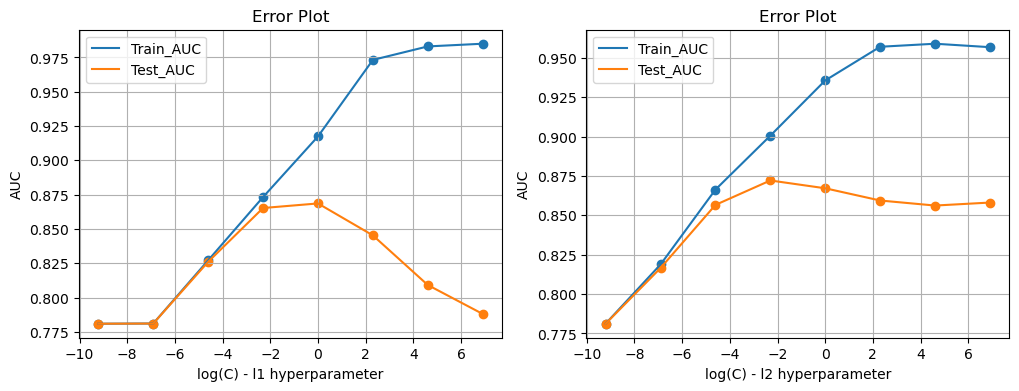

In [44]:
f, axes = plt.subplots(1, 2 , figsize=(12,4))
for i in range(2):
    title ='log(C) - l1 hyperparameter' if i== 0 else 'log(C) - l2 hyperparameter'
    train_auc = gridcv.cv_results_['mean_train_score'][0+i:16+i:2]
    test_auc = gridcv.cv_results_['mean_test_score'][0+i:16+i:2]
    axes[i].grid(True)
    axes[i].plot(np.log(C), train_auc, label = 'Train_AUC')
    axes[i].plot(np.log(C), test_auc, label = 'Test_AUC')
    axes[i].scatter(np.log(C), train_auc)
    axes[i].scatter(np.log(C), test_auc)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('AUC')
    axes[i].set_title('Error Plot')
    axes[i].legend()
plt.show()

In [48]:
import math

In [50]:
math.exp(-4)

0.01831563888873418

In [52]:
math.exp(-6.5)

0.0015034391929775724

In [54]:
math.exp(-2.2)

0.11080315836233387

#### we can see that at C =0.1 and whith L2 regularizaion  model showing good result/score on both test and traning dataset

In [59]:
# making ROC Curve

In [156]:
log_r = LogisticRegression(solver = 'liblinear', C = 0.1, penalty = 'l2' )

In [158]:
log_r = log_r.fit(X_train_bow, y_train)

In [160]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, log_r.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, log_r.predict_proba(X_test_bow)[:,1])

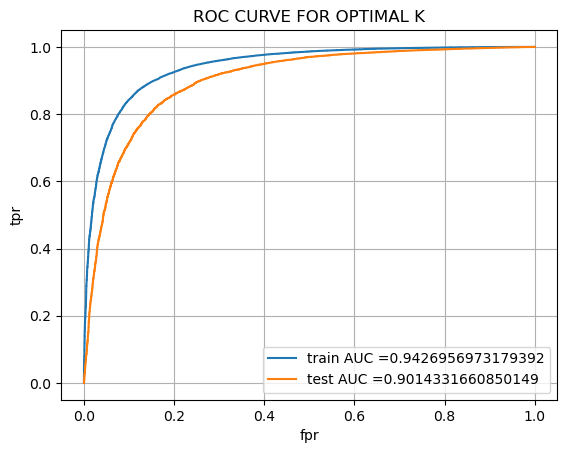

In [162]:
plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

In [164]:
from sklearn.metrics import confusion_matrix
# confusion matrix
def confusion_matrixes(model, X_train, y_train, X_test, y_test):
    train_cm = confusion_matrix(y_train,model.predict(X_train))
    test_cm = confusion_matrix(y_test, model.predict(X_test))
    col_n = ['Negitive','Positive']
    df_train = pd.DataFrame(train_cm,index = col_n, columns= col_n)
    df_test = pd.DataFrame(test_cm,index = col_n, columns= col_n)
    f, axes = plt.subplots(1,2,figsize= (12,4))

    for i in range(2):
        df = df_train if i == 0 else df_test
        sns.heatmap(df,annot = True, cmap = 'inferno', ax = axes[i], fmt = 'd')
        axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    plt.show()

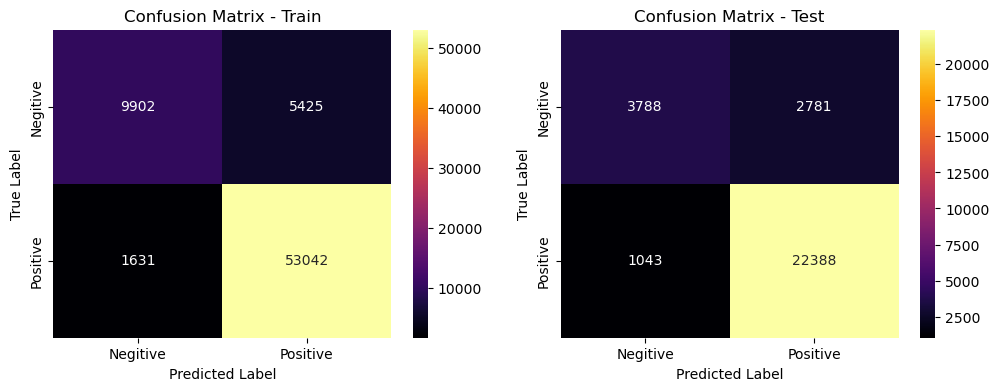

In [166]:
confusion_matrixes(log_r, X_train_bow, y_train, X_test_bow, y_test)

In [168]:
coff = log_r.coef_.reshape(-1,1)
df_imp = pd.DataFrame(coff,columns = ['coef'],index = bow_features)
print('positive words')
positive = df_imp.sort_values(by = 'coef', ascending= False).head(10)
print(positive)
print("="*50)
print('Negitive words')
negitive = df_imp.sort_values(by = 'coef').head(10)
print(negitive)

positive words
               coef
excellent  1.383414
delicious  1.266162
perfect    1.261638
highly     1.259622
beat       1.093022
hook       1.084167
wonderful  1.070364
amazing    1.064675
awesome    1.063231
yummy      1.032007
Negitive words
                    coef
terrible       -1.586960
disappointing  -1.427603
awful          -1.400700
disappointment -1.395226
refund         -1.366344
horrible       -1.348827
disappointed   -1.305698
unfortunately  -1.263590
return         -1.134702
disappoint     -1.128305


#### we can see that logestic regression performing better then naive_Bayes 

# 2. TF-IDF

In [200]:
#loding data

In [142]:
X_train_tfidf = pickle.load(open('tfidf_vectors/X_train_tfidf','rb'))
X_test_tfidf = pickle.load(open('tfidf_vectors/X_test_tfidf','rb'))
tfidf_features = pickle.load(open('tfidf_vectors/tfidf_features','rb'))

In [144]:
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1,1,10,100,1000]
grid = {'penalty': penalty, 'C': C}
log_reg1 = LogisticRegression(solver = 'liblinear')
gridcv2 = GridSearchCV(log_reg1, grid, cv =5,return_train_score = True,n_jobs=-1)
gridcv2.fit(X_train_tfidf,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [216]:
print(gridcv2.best_params_)

{'C': 1, 'penalty': 'l1'}


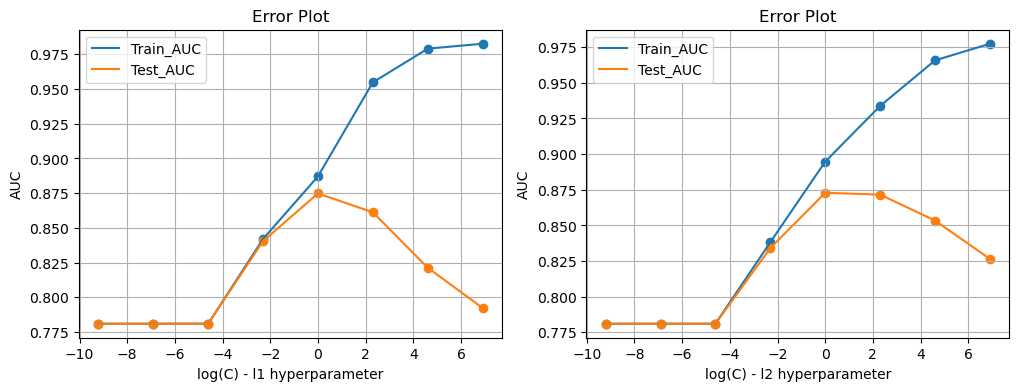

In [148]:
f, axes = plt.subplots(1, 2 , figsize=(12,4))
for i in range(2):
    title ='log(C) - l1 hyperparameter' if i== 0 else 'log(C) - l2 hyperparameter'
    train_auc_1 = gridcv2.cv_results_['mean_train_score'][0+i:16+i:2]
    test_auc_1 = gridcv2.cv_results_['mean_test_score'][0+i:16+i:2]
    axes[i].grid(True)
    axes[i].plot(np.log(C), train_auc_1, label = 'Train_AUC')
    axes[i].plot(np.log(C), test_auc_1, label = 'Test_AUC')
    axes[i].scatter(np.log(C), train_auc_1)
    axes[i].scatter(np.log(C), test_auc_1)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('AUC')
    axes[i].set_title('Error Plot')
    axes[i].legend()
plt.show()

#### by both the graph we can see that L2 regularization is performing well by L1 may be has point age

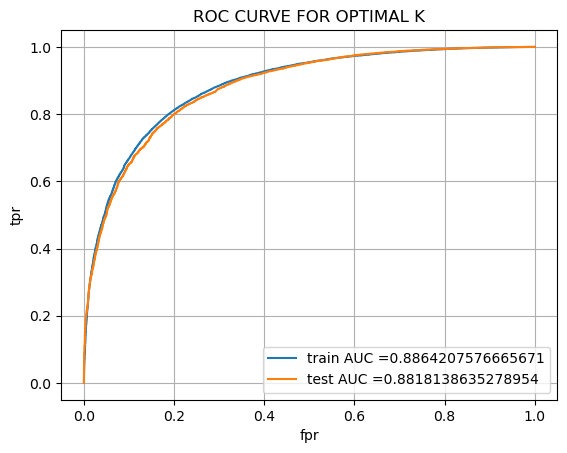

In [251]:
# roc curve

log_r1 = LogisticRegression(solver = 'liblinear', C = 0.1, penalty = 'l1' )

log_r1 = log_r1.fit(X_train_tfidf, y_train)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, log_r1.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, log_r1.predict_proba(X_test_tfidf)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

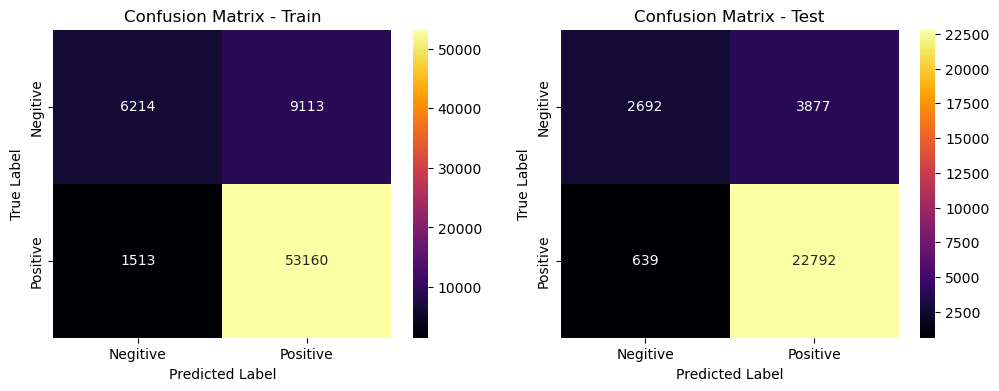

In [194]:
confusion_matrixes(log_r1, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [196]:
coff = log_r1.coef_.reshape(-1,1)
df_imp = pd.DataFrame(coff,columns = ['coef'],index = tfidf_features)
print('positive words')
positive = df_imp.sort_values(by = 'coef', ascending= False).head(10)
print(positive)
print("="*50)
print('Negitive words')
negitive = df_imp.sort_values(by = 'coef').head(10)
print(negitive)

positive words
                coef
great      10.819319
delicious   8.866541
perfect     8.473113
love        8.393851
excellent   7.175173
highly      6.619821
wonderful   6.092787
good        5.918099
favorite    5.039743
easy        4.558367
Negitive words
                   coef
bad           -6.538950
terrible      -6.138030
return        -6.068764
awful         -5.844612
unfortunately -5.522237
ok            -5.404544
horrible      -5.374753
disappointed  -5.235962
disappoint    -5.093102
waste         -4.622711


## 3. Avg Word2Vector

In [204]:
# loading dataset

In [206]:
X_train_avgw2v = pickle.load(open('w2v/avgw2v_train','rb'))
X_test_avgw2v = pickle.load(open('w2v/avgw2v_test','rb'))
w2v_words = pickle.load(open('w2v/w2v_words','rb'))

In [208]:
penalty = ['l1', 'l2']
C = [0.0001,0.001,0.01,0.1,1,10,100,1000]
grid = {'penalty': penalty, 'C': C}
log_reg2 = LogisticRegression(solver = 'liblinear')
gridcv3 = GridSearchCV(log_reg2, grid, cv =5,return_train_score = True,n_jobs=-1)
gridcv3.fit(X_train_avgw2v,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [212]:
print(gridcv3.best_params_)

{'C': 10, 'penalty': 'l2'}


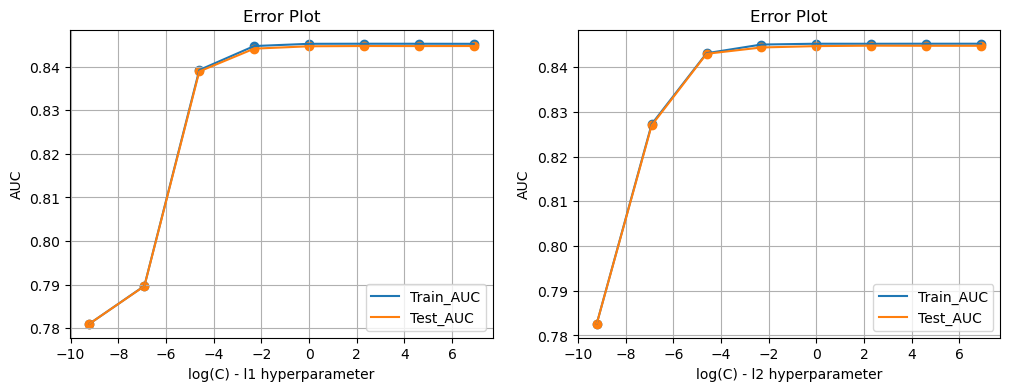

In [218]:
f, axes = plt.subplots(1, 2 , figsize=(12,4))
for i in range(2):
    title ='log(C) - l1 hyperparameter' if i== 0 else 'log(C) - l2 hyperparameter'
    train_auc_2 = gridcv3.cv_results_['mean_train_score'][0+i:16+i:2]
    test_auc_2 = gridcv3.cv_results_['mean_test_score'][0+i:16+i:2]
    axes[i].grid(True)
    axes[i].plot(np.log(C), train_auc_2, label = 'Train_AUC')
    axes[i].plot(np.log(C), test_auc_2, label = 'Test_AUC')
    axes[i].scatter(np.log(C), train_auc_2)
    axes[i].scatter(np.log(C), test_auc_2)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('AUC')
    axes[i].set_title('Error Plot')
    axes[i].legend()
plt.show()

In [229]:
math.exp(2.3)

9.974182454814718

#### here we see that model with hyperparameter of L2 reg have good AUC for both traing and testing data

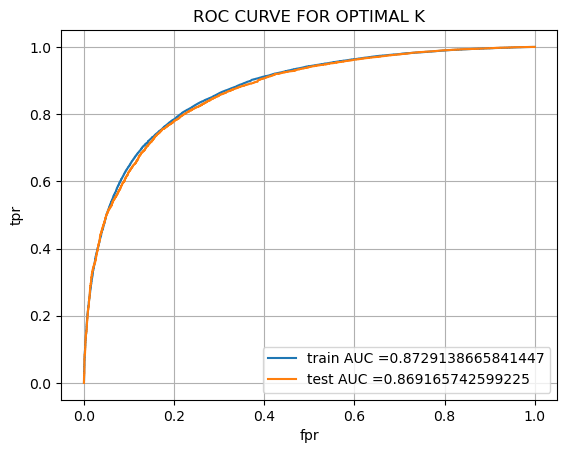

In [240]:
# roc curve

log_r2 = LogisticRegression(solver = 'liblinear', C = 10, penalty = 'l2' )

log_r2 = log_r1.fit(X_train_avgw2v, y_train)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, log_r2.predict_proba(X_train_avgw2v)[:,1])
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, log_r2.predict_proba(X_test_avgw2v)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

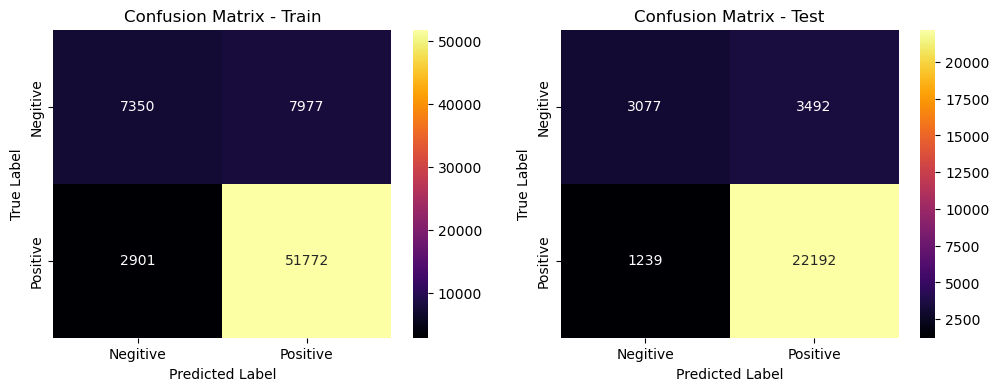

In [242]:
confusion_matrixes(log_r2, X_train_avgw2v, y_train, X_test_avgw2v, y_test)

## Observation and Calculation


In [249]:
from prettytable import PrettyTable

In [255]:
z = PrettyTable()
z.field_names = ["vector","Algorithm","regulariazation","Hyperparameter(C)","Train-AUC","Test-AUC"]
z.add_row(['BOW','Logistic Regression','l2',0.1,0.94,0.90])
z.add_row(['TFIDF','Logistic Regression','l1',1,0.886,0.881])
z.add_row(['Average W2v','Logistic Regression','l2',10,0.87,0.86])

In [257]:
print(z)

+-------------+---------------------+-----------------+-------------------+-----------+----------+
|    vector   |      Algorithm      | regulariazation | Hyperparameter(C) | Train-AUC | Test-AUC |
+-------------+---------------------+-----------------+-------------------+-----------+----------+
|     BOW     | Logistic Regression |        l2       |        0.1        |    0.94   |   0.9    |
|    TFIDF    | Logistic Regression |        l1       |         1         |   0.886   |  0.881   |
| Average W2v | Logistic Regression |        l2       |         10        |    0.87   |   0.86   |
+-------------+---------------------+-----------------+-------------------+-----------+----------+
